This notebook uses the pipeline_mod.py to generate recommended_items_knn and then analyzes the solution with plots

In [1]:
import aux_graphs
# import aux_recpack
import importlib
import pandas as pd

# Dataframe setup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 4)

#just bc i am tired of seeing it and dont plan to fix it
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


We either generate new recommendations

In [ ]:
#need to go into the aux class in order to change up the algorithm
recommended_items_knn = aux_recpack.pipeline_mod()
recommended_items_knn.to_csv('recommendations.csv', index=False)  

Or if we have them, load the saved ones

In [2]:
recommended_items_knn = pd.read_csv('recommended_articles_KNN.csv')
recommended_items_pop = pd.read_csv('recommended_articles_pop.csv')
recommended_items_kunn = pd.read_csv('recommended_articles_kunn.csv')

either way, load initial data

In [3]:
articles = pd.read_csv('../../00 - Data/articles/articles.csv')
transactions = pd.read_csv('../../00 - Data/transactions/transactions_train.csv')

In [41]:
print("The are " + str(len(articles)) + " articles and "+ str(len(recommended_items_knn)) + " recommended_items_knn")
print("This is recommending " + str (len(recommended_items_knn) / len(articles) * 100) +"% of everything for knn \n")

print("The are " + str(len(articles)) + " articles and "+ str(len(recommended_items_pop)) + " recommended_items_pop")
print("This is recommending " + str (len(recommended_items_pop) / len(articles) * 100) +"% of everything for pop")


print("The are " + str(len(articles)) + " articles and "+ str(len(recommended_items_kunn)) + " recommended_items_kunn")
print("This is recommending " + str (len(recommended_items_kunn) / len(articles) * 100) +"% of everything for kunn")

The are 105542 articles and 11256 recommended_items_knn
this shit is reocmmending 10.66494855128764% of everything for knn 

The are 105542 articles and 3 recommended_items_pop
this shit is reocmmending 0.002842470296185405% of everything for pop


Add fabric info

Maybe we should have done this before, as a feature in the preprocessing of data (defenitely) -- TODO

Code from @Wnick on Discord

In [26]:
recommended_items_pop

,Unnamed: 0,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,number_of_repeats
0,1714,372860002,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,10,White,3,Light,9,White,3611,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.,14
1,53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...,508
2,67522,751471001,751471,Pluto RW slacks (1),272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,1722,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Ankle-length cigarette trousers in a stretch w...,44441


In [4]:
recommended_items_knn['detail_desc'] = recommended_items_knn['detail_desc'].fillna('')

# Extract fabric names from descriptions
fabric_names = ['jeans','cotton', 'wool', 'polyester', 'silk', 'denim', 'linen', 'spandex', 'rayon', 'nylon', 'leather', 'suede']

# Create fabric features
for fabric in fabric_names:
    recommended_items_knn[f'{fabric}'] = recommended_items_knn['detail_desc'].str.contains(fabric, case=False, regex=True).astype(int)

#get the number of rows without fabric
fabric_columns = [f'{fabric}' for fabric in fabric_names]
rows_without_any_fabric = recommended_items_knn[(recommended_items_knn[fabric_columns] != 1).all(axis=1)]


How personalized are the recomendations ?

In [7]:
recommended_items_knn.number_of_repeats.sum()

44999

/media/pablo/Windows_files/master/[AI] ai_project/01 - Project/04 - Research_Implementation/02 - Recpack/aux_graphs.py:208: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=recommended_items, x='number_of_repeats', bins=range(0, 21),pallete= palette)


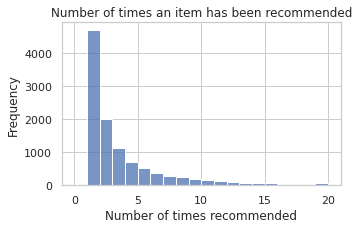

In [6]:
importlib.reload(aux_graphs)

plt = aux_graphs.number_of_repeats(recommended_items_knn)
plt.show()

#### PLOTS

PLOT 1 :  Difference in men/women clothes recommendations

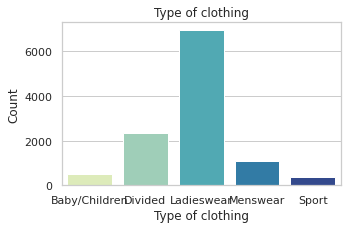

In [49]:
importlib.reload(aux_graphs)

indx_grp = recommended_items_knn.groupby('index_group_name').size()
# indx_grp = indx_grp.sort_values(ascending=False)

plt = aux_graphs.sns_bar(indx_grp)
plt.xlabel('Type of clothing')  
plt.ylabel('Count') 
plt.title('Type of clothing') 

plt.show()

PLOT 1.1 :  Difference in men/women clothes recommendations normalized

There is waay more clothes for women (and probably women buyers) than men so it is expected that the recommendation is higher for it.

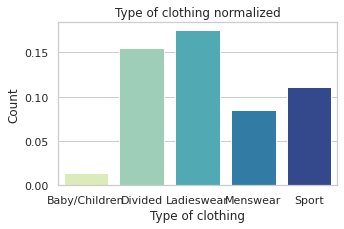

In [18]:
importlib.reload(aux_graphs)

articles_grp = articles.groupby('index_group_name').size()
idnx_normalized = indx_grp.div(articles_grp, fill_value=0)

plt = aux_graphs.sns_bar(idnx_normalized)
plt.xlabel('Type of clothing')  
plt.ylabel('Count') 
plt.title('Type of clothing normalized') 
plt.show()

-------------------------------------

##### Colores

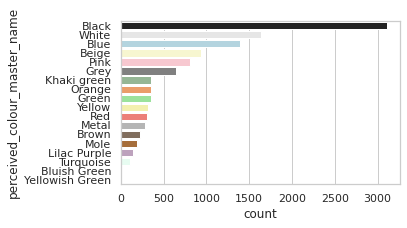

In [21]:
plt = aux_graphs.sns_color_ord(recommended_items_knn)

/media/pablo/Windows_files/master/[AI] ai_project/01 - Project/04 - Research_Implementation/02 - Recpack/aux_graphs.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_colors['grouped_color'] = known_colors['perceived_colour_master_name'].map(reverse_lookup)


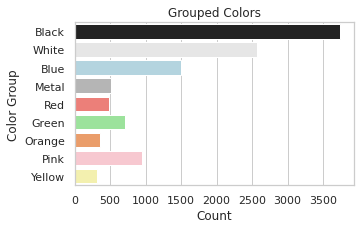

In [22]:
importlib.reload(aux_graphs)
plt = aux_graphs.sns_color_grp(recommended_items_knn)

##### 2.1 Brillo colores

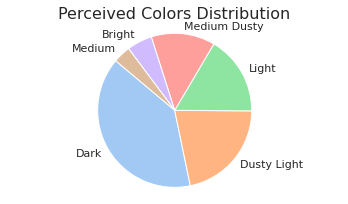

In [23]:
importlib.reload(aux_graphs)

plt = aux_graphs.plt_brightness_pie(recommended_items_knn)
plt.show()

##### 2.3 Colores estacionales

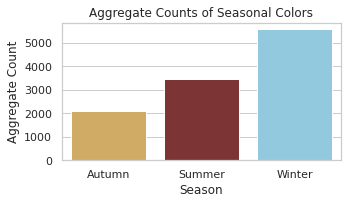

In [33]:
importlib.reload(aux_graphs)
plt = aux_graphs.sns_season_color(recommended_items_knn)
plt.show()

3. Tipos de tejido

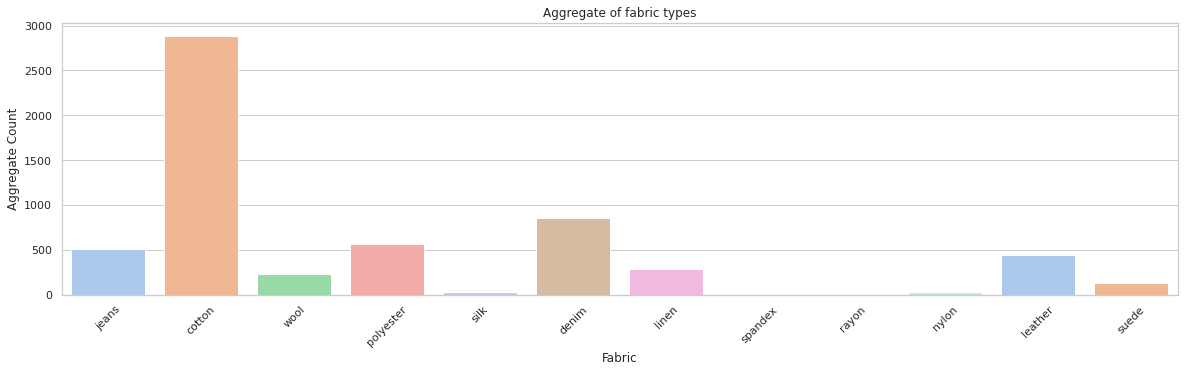

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt = aux_graphs.sns_fabric_usd(recommended_items_knn,articles,0)
plt.show()

/tmp/ipykernel_6552/1386134394.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['{:,.0f}'.format(x) for x in plot.get_xticks()])


[Text(0.1, 0, '0'),
 Text(1.0, 0, '1'),
 Text(10.0, 0, '10'),
 Text(100.0, 0, '100'),
 Text(1000.0, 0, '1,000'),
 Text(10000.0, 0, '10,000'),
 Text(100000.0, 0, '100,000')]

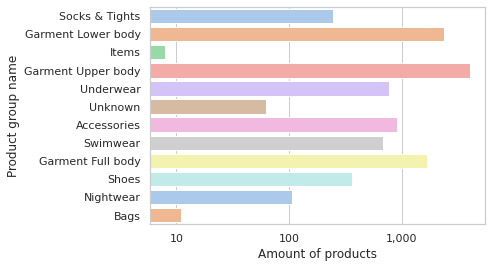

In [19]:
import seaborn as sns
plot = sns.countplot(y='product_group_name', data=recommended_items_knn, palette='pastel')
plot.set_xscale("log")
plot.set_xlabel('Amount of products')
plot.set_ylabel('Product group name')
plot.set_xticklabels(['{:,.0f}'.format(x) for x in plot.get_xticks()])

4. Precio

/home/pablo/.local/lib/python3.10/site-packages/seaborn/_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


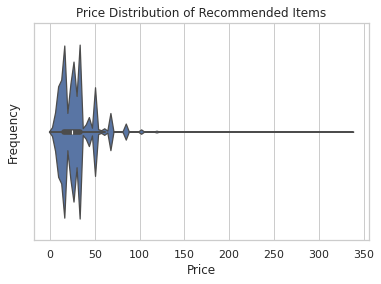

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# Merge the recommended_items_knn and transactions on 'article_id'
merged_data = pd.merge(recommended_items_knn, transactions, on='article_id', how='left')

# Retrieve prices corresponding to article_id and save them
prices = merged_data['price'] * 1000
# Create a violin plot
sns.violinplot(x=prices, orient='v', scale='width')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution of Recommended Items')
plt.show()

-----------------old stuff

In [ ]:
importlib.reload(aux_graphs)
plt = aux_graphs.sns_index_grp_name(recommended_items_knn)
plt.show()

In [ ]:
importlib.reload(aux_graphs)
plt = aux_graphs.color_grp_sns(recommended_items_knn)
plt.show()

In [ ]:
importlib.reload(aux_graphs)
plt = aux_graphs.color_grp(recommended_items_knn)
plt.show()

In [ ]:
individual_colors = recommended_items_knn['colour_group_name'].unique()
individual_colors

In [ ]:

# Grouping by 'product_group_name' and 'product_type_name', then counting occurrences
grouped_data = recommended_items_knn.groupby(['product_group_name', 'product_type_name']).size().unstack()

# Plotting the stacked bar plot
plt.figure(figsize=(12, 8))  # Define the size of the plot

grouped_data.plot(kind='bar', stacked=True)  # Create a stacked bar plot
plt.title('Stacked Bar Plot of Product Types by Product Groups')  # Add a title to the plot
plt.xlabel('Product Group')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Show legend

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot